# __E-COMERCE RFM ANALYST__



RFM analytics is a segmentation method used to understand and manage customer behavior. This method evaluates the factors of recent purchases (Recency), purchase frequency (Frequency) and order value (Monetary). It focuses on criteria like how long customers spend inactive, how often they shop, and the total amount they spend.

Recency determines a customer's recent activity level. Customers who have interacted more recently are often considered more valuable. Frequency indicates how often customers make purchases in a certain period of time. Customers' frequent purchases can be an important indicator of customer loyalty. Order value (Monetary) refers to the total customer spend, representing the overall value of the customer.

Based on RFM analysis, we can divide customers into different segments. After dividing customers into different segments, we can rely on them to develop customized marketing strategies and personalize customer experiences.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings(action="ignore")

In [2]:
df =  pd.read_csv("data.csv", encoding="ISO-8859-1")

__Check data load into dataframe__

In [3]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [4]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
df.shape

(541909, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


__Check for null values and remove it from the dataframe__

In [7]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
df.dropna(inplace=True)

__Eliminate invoices with 'InvoiceNo' starting with "C" because they are refundable invoices__

In [9]:
df = df[~df['InvoiceNo'].str.contains('C')]

__Convert related columns to datetime format to calculate RFM__

In [10]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df['Total_price'] = df['Quantity'] * df['UnitPrice']

In [11]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


__Calculate total order value for each customer (Monetary)__

In [12]:
df.groupby('CustomerID')['Total_price'].sum()

CustomerID
12346.0    77183.60
12347.0     4310.00
12348.0     1797.24
12349.0     1757.55
12350.0      334.40
             ...   
18280.0      180.60
18281.0       80.82
18282.0      178.05
18283.0     2094.88
18287.0     1837.28
Name: Total_price, Length: 4339, dtype: float64

__Calculate the number of purchases for each customer (Frequency)__

In [13]:
df.groupby('CustomerID')['InvoiceNo'].count()

CustomerID
12346.0      1
12347.0    182
12348.0     31
12349.0     73
12350.0     17
          ... 
18280.0     10
18281.0      7
18282.0     12
18283.0    756
18287.0     70
Name: InvoiceNo, Length: 4339, dtype: int64

__To calculate the Recency value, I select 7 days after the relevant deadline as the analysis date__

In [14]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'].dt.date)

max_date = df['InvoiceDate'].max()

analysis_date = max_date + pd.DateOffset(days = 7)

In [15]:
rfm = df.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (pd.Timestamp(analysis_date) - x.max()).days,
    "InvoiceNo": "count",
    "Total_price": "sum"
})


In [16]:
rfm.head()

,InvoiceDate,InvoiceNo,Total_price
CustomerID,,,
12346.0,332,1,77183.60
12347.0,9,182,4310.00
12348.0,82,31,1797.24
12349.0,25,73,1757.55
12350.0,317,17,334.40


__Calculate RFM score__

In [17]:
rfm.columns = ["Recency","Frequency","Monetary"]

In [18]:
rfm["Recency_score"] = pd.qcut(rfm["Recency"], 5, labels= [5,4,3,2,1])
rfm["Frequency_score"] = pd.qcut(rfm["Frequency"].rank(method="first"), 5, labels= [1,2,3,4,5])
rfm["Monetary_score"] = pd.qcut(rfm["Monetary"], 5, labels = [1,2,3,4,5])

In [19]:
rfm["RF_score"] = rfm["Recency_score"].astype(str) + rfm["Frequency_score"].astype(str) 
rfm["RFM_score"] = rfm["Recency_score"].astype(str) + rfm["Frequency_score"].astype(str) + rfm["Monetary_score"].astype(str)

__Classify customers based on the previously calculated scale__

In [20]:
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At_risk',
    r'[1-2]5': 'Cant_loose',
    r'3[1-2]': 'About_to_sleep',
    r'33': 'Need_attention',
    r'[3-4][4-5]': 'Loyal_customers',
    r'41': 'Promising',
    r'51': 'New_customers',
    r'[4-5][2-3]': 'Potential_loyalists',
    r'5[4-5]': 'Champions'
}

rfm['segment'] = rfm['RF_score'].replace(seg_map, regex=True)

In [21]:
rfm.head()

,Recency,Frequency,Monetary,Recency_score,Frequency_score,Monetary_score,RF_score,RFM_score,segment
CustomerID,,,,,,,,,
12346.0,332,1,77183.60,1,1,5,11,115,Hibernating
12347.0,9,182,4310.00,5,5,5,55,555,Champions
12348.0,82,31,1797.24,2,3,4,23,234,At_risk
12349.0,25,73,1757.55,4,4,4,44,444,Loyal_customers
12350.0,317,17,334.40,1,2,2,12,122,Hibernating


In [22]:
rfm = rfm.reset_index()

In [23]:
rfm[["segment","Recency","Frequency","Monetary"]].groupby("segment").agg(["mean", "count"])

Recency         Frequency           Monetary      
                           mean count        mean count         mean count
segment                                                                   
About_to_sleep        59.325949   316   15.740506   316   449.344873   316
At_risk              173.096055   583   56.190395   583   985.514923   583
Cant_loose           150.226190    84  181.666667    84  2370.705012    84
Champions             12.411862   607  288.650741   607  6950.135074   607
Hibernating          216.466981  1060   13.385849  1060   536.726238  1060
Loyal_customers       40.224117   821  156.633374   821  2835.492862   821
Need_attention        58.733333   210   41.295238   210   845.590048   210
New_customers         13.309091    55    7.345455    55  3742.133091    55
Potential_loyalists   22.728916   498   34.337349   498   905.155424   498
Promising             29.161905   105    7.228571   105   437.718381   105

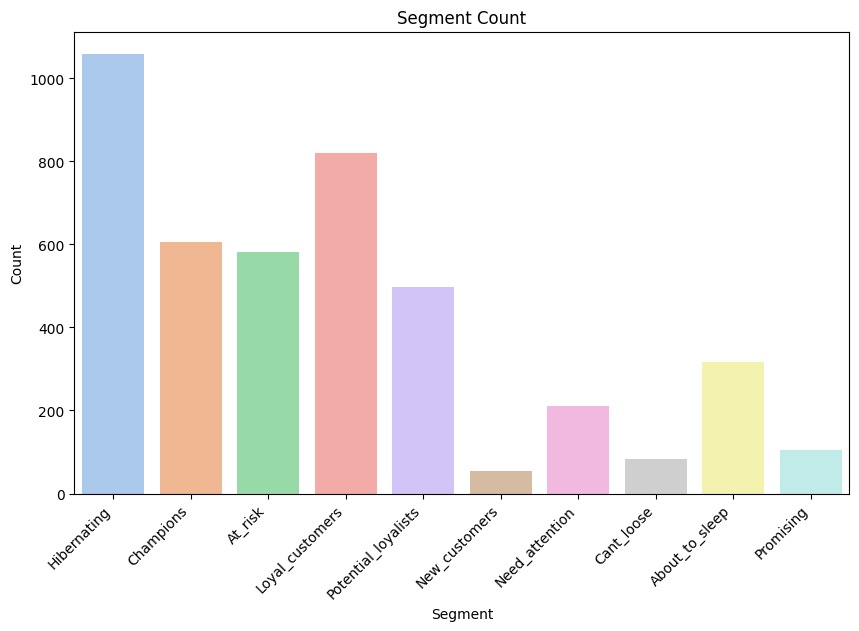

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(x='segment', data=rfm, palette="pastel")
plt.title('Segment Count')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show();

# __Proposal__

1. Hibernating
- Special offers can stimulate this group of customers to buy again
- They may be interested in new campaigns and deep discounts
2. At risk
- Need to pay more attention to this group of customers to increase customer satisfaction
- Try to retain customers by offering special discounts or loyalty programs
3. Can't lose
- Their loyalty to the brand can be increased by giving extra gifts when they purchase a certain amount
- Offer special offers to introduce new products or services
4. About to sleep
- Launch more campaigns to increase interaction with these customers
- Customers can return with special offers
5. Need attention
- New products and services that will attract their attention can be introduced
- Feedback from this customer group can be collected to improve customer service
6. Loyal customers
- Offer additional incentives and privileges to this customer group
- The satisfaction of this customer group can be enhanced with the above incentives and privileges
7. Promises
- The relationships of this customer group can be strengthened by interacting more with these customers
- Implement new product introductions through special promotions
8. New customers
- You can increase the loyalty of this customer group by giving special gifts for first purchases
- Impress and increase the satisfaction of this customer group with welcome offers
9. Potenial loyalists
- Encourage this group of customers to join the loyalty program
- Customer group loyalty can be reinforced with special discount programs
10. Champions
- These customers may be offered special perks and offers
- By using them as brand ambassadors, they can attract more customers